In [1]:
import sys
if "../" not in sys.path:
  sys.path.append("../")

import gym
import torch.optim as optim

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

from reinforce_baseline import PolicyEstimator, ValueEstimator, reinforce_baseline
from utils import plotting

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
env = gym.make('CartPole-v0')

[2017-03-01 23:02:02,620] Making new env: CartPole-v0


In [3]:
state_D = env.observation_space.shape[0]
action_D = env.action_space.n

policy_estimator = PolicyEstimator(state_D, action_D, hidden_size=128)
policy_optimizer = optim.Adam(policy_estimator.parameters(), lr=1e-2)

value_estimator = ValueEstimator(state_D, hidden_size=128)
value_optimizer = optim.Adam(value_estimator.parameters(), lr=5e-2)

In [4]:
stats = reinforce_baseline(
    env,
    policy_estimator,
    policy_optimizer,
    value_estimator,
    value_optimizer,
    num_episodes=200,
    discount_factor=0.99,
    render=False
)

Episode 0	Running reward: 0.18
Episode 10	Running reward: 1.81
Episode 20	Running reward: 3.39
Episode 30	Running reward: 5.07
Episode 40	Running reward: 6.85
Episode 50	Running reward: 8.66
Episode 60	Running reward: 12.84
Episode 70	Running reward: 17.77
Episode 80	Running reward: 24.22
Episode 90	Running reward: 27.88
Episode 100	Running reward: 34.24
Episode 110	Running reward: 40.43
Episode 120	Running reward: 45.40
Episode 130	Running reward: 51.68
Episode 140	Running reward: 73.13
Episode 150	Running reward: 87.35
Episode 160	Running reward: 109.71
Episode 170	Running reward: 207.81
Solved! Running reward is now 207.80895502093077 and the last episode runs to 5584 time steps!


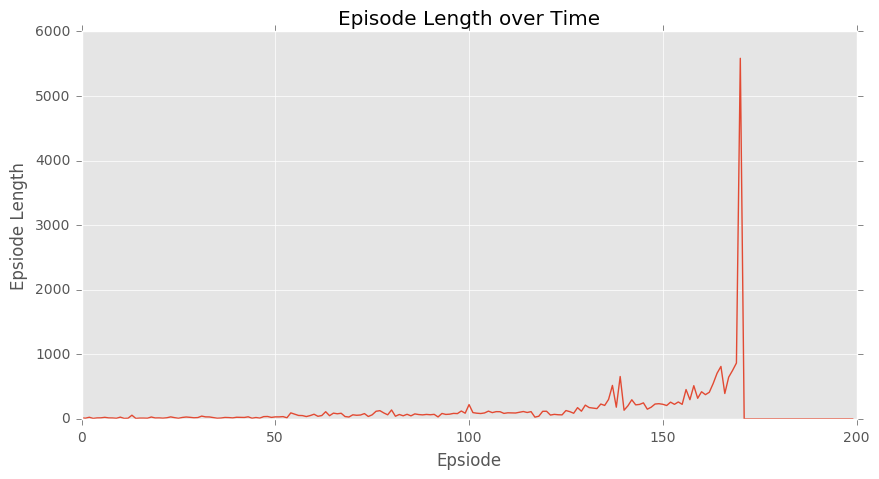

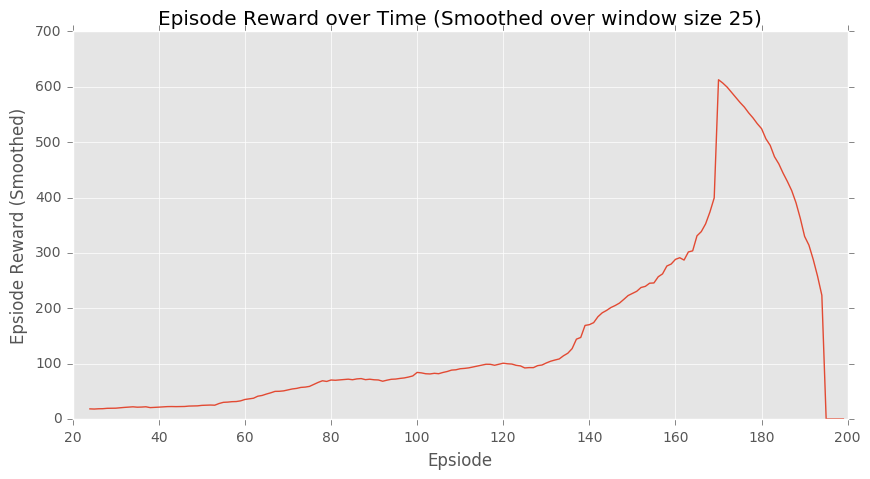

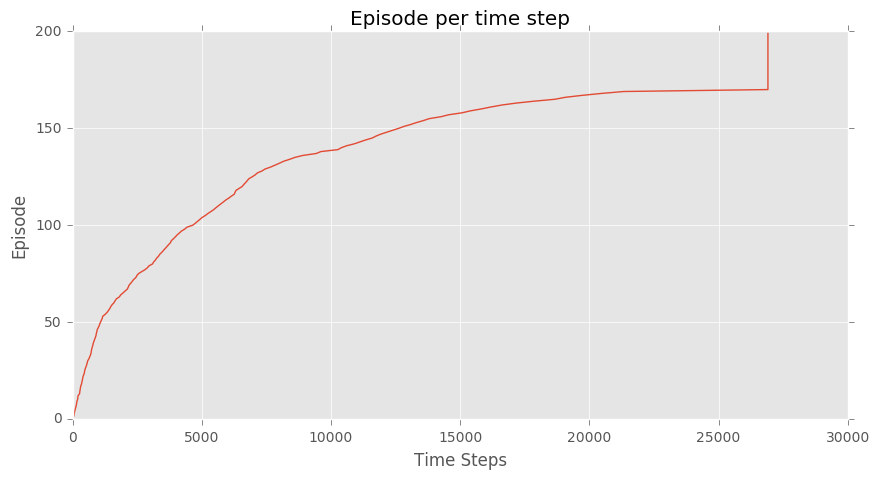

(<matplotlib.figure.Figure at 0x115f78438>,
 <matplotlib.figure.Figure at 0x105bfff60>)

In [5]:
plotting.plot_episode_stats(stats, smoothing_window=25)